In [22]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np


In [23]:
data = pd.read_csv('data.csv')
data.dtypes
data.info()
data['MSISDN/Number'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
Bearer Id                                   149010 non-null float64
Start                                       150000 non-null object
Start ms                                    150000 non-null float64
End                                         150000 non-null object
End ms                                      150000 non-null float64
Dur. (ms)                                   150000 non-null float64
IMSI                                        149431 non-null float64
MSISDN/Number                               148935 non-null float64
IMEI                                        149429 non-null float64
Last Location Name                          148848 non-null object
Avg RTT DL (ms)                             122172 non-null float64
Avg RTT UL (ms)                             122189 non-null float64
Avg Bearer TP DL (kbps)                     150000 non-null float64
Avg Bear

106856

In [24]:
#identifying top 10 handsets
handset = data['Handset Type']
manufacturer = data['Handset Manufacturer']
handset.dropna()
print('Most common handsets')
print(handset.value_counts()[:10])

print('top 3 handset manufacturers')
manufacturer.value_counts()[:3]



Most common handsets
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64
top 3 handset manufacturers


Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [25]:
#top 5 handsets per manufacturer
manufacturers = data['Handset Manufacturer']
manufacturers = data.drop_duplicates('Handset Manufacturer')
manufacturer = manufacturers['Handset Manufacturer']
for manu in manufacturer:
    x = data.where(data['Handset Manufacturer'] == manu)
    print('top 5 handsets of',manu)
    print(x['Handset Type'].value_counts()[:5])

top 5 handsets of Samsung
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64
top 5 handsets of undefined
undefined    8987
Name: Handset Type, dtype: int64
top 5 handsets of Huawei
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64
top 5 handsets of Apple
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64
top 5 handsets of Zte
Zte Mf259                                                                                170
Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro  

top 5 handsets of Shenzhen Kdi Communication Co Ltd
Shenzhen Kdi Com. D58    5
Name: Handset Type, dtype: int64
top 5 handsets of Simcom Wireless Solutions Co Ltd
Simcom Wireless. Sim900           3
Simcom Wireless. Sim800H          1
Simcom Wireless. Simcom Sim900    1
Name: Handset Type, dtype: int64
top 5 handsets of Qingdao Hisense Communications Co Ltd
Qingdao Hisense. Hisense F17 Pro                                                   4
Qingdao Hisense. Hs-U609 Hisense I500U Hisense E260U Hs-U607 Hs-U980 Pure 1 Eco    3
Qingdao Hisense. Hisense F31                                                       3
Qingdao Hisense. Hisense F23                                                       3
Qingdao Hisense. Hisense C20                                                       3
Name: Handset Type, dtype: int64
top 5 handsets of Lg
Lg G6         31
Lg Lg-E610     8
Lg-K350Nds     7
Lg L Bello     7
Lg Lg-P700     7
Name: Handset Type, dtype: int64
top 5 handsets of Archos Sa
Archos Sa 50 Sa

top 5 handsets of Fairphone B.V
Fairphone B.V Fairphone 2    4
Name: Handset Type, dtype: int64
top 5 handsets of Doke Communication (Hk) Limited
Doke Communicati. Blackview Bv6800 Pro    1
Name: Handset Type, dtype: int64
top 5 handsets of Lemobile Information Technology (Beijing) Co Ltd
Lemobile Informa. Lex651     1
Lemobile Informa. Le X820    1
Lemobile Informa. Lex720     1
Lemobile Informa. Le X527    1
Lemobile Informa. Lex626     1
Name: Handset Type, dtype: int64
top 5 handsets of Shenzhen Boway Electronic Co Ltd
Shenzhen Boway E. Boway Boway U11    5
Name: Handset Type, dtype: int64
top 5 handsets of Rainbow Communication (Private) Limited
Rainbow Communic. C45    3
Name: Handset Type, dtype: int64
top 5 handsets of TCT Mobile Suzhou Limited
Tct Mobile Suzho. Alcatel One Touch 6030X                                                      4
Tct Mobile Suzho. Alcatel One Touch Pop C1 Alcatel One Touch Pop C1 Alcatel One Touch Pixi2    2
Tct Mobile Suzho. Alcatel One Touch Y580D  

top 5 handsets of Telit
Telit Ul865-Eur      7
Telit Le910-Eu V2    2
Telit Le910-Eug      1
Name: Handset Type, dtype: int64
top 5 handsets of Itel Technology Limited
Itel Technology. S31    1
Itel Technology. S33    1
Name: Handset Type, dtype: int64
top 5 handsets of Power Idea Technology (Shenzhen) Co Ltd
Power Idea Techn. Rg310                                               4
Power Idea Techn. Rg730 Md501 D1                                      1
Power Idea Techn. Ruggear Rg230 Ruggear Rg500 I.Safe Innovation2.0    1
Power Idea Techn. Rg160                                               1
Name: Handset Type, dtype: int64
top 5 handsets of Mptech
Mptech Hammer Energy 18X9    1
Name: Handset Type, dtype: int64
top 5 handsets of KVD International Group Limited
Kvd Internationa. Doogee X5    1
Name: Handset Type, dtype: int64
top 5 handsets of Pt. Arga Mas Lestari
Pt. Arga Mas Les. Advan S35D    1
Name: Handset Type, dtype: int64
top 5 handsets of Group Acquisitions Limited
Group Acquis

# Task 1: User Overview analysis

## filling null values

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
Bearer Id                                   149010 non-null float64
Start                                       150000 non-null object
Start ms                                    150000 non-null float64
End                                         150000 non-null object
End ms                                      150000 non-null float64
Dur. (ms)                                   150000 non-null float64
IMSI                                        149431 non-null float64
MSISDN/Number                               148935 non-null float64
IMEI                                        149429 non-null float64
Last Location Name                          148848 non-null object
Avg RTT DL (ms)                             122172 non-null float64
Avg RTT UL (ms)                             122189 non-null float64
Avg Bearer TP DL (kbps)                     150000 non-null float64
Avg Bear

## Aggregation

## number of xDr Sessions

In [27]:
user = data.groupby(['MSISDN/Number'])
xDr_sessions = user['Bearer Id'].count()
xDr_sessions = xDr_sessions.reset_index()
xDr_sessions.rename(columns={'Bearer Id':'# sessions'})
xDr_sessions

,MSISDN/Number,Bearer Id
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2
5,3.360101e+10,2
6,3.360101e+10,2
7,3.360101e+10,1
8,3.360101e+10,2
9,3.360102e+10,1


## session duration

In [28]:
duration = user['Dur. (ms).1'].sum()
duration

MSISDN/Number
3.360100e+10    116720140.0
3.360100e+10    181230963.0
3.360100e+10    134969374.0
3.360101e+10     49878024.0
3.360101e+10     37104453.0
3.360101e+10    253983077.0
3.360101e+10    128360523.0
3.360101e+10     86399977.0
3.360101e+10    495702147.0
3.360102e+10    124854778.0
3.360102e+10    248424089.0
3.360102e+10     38416201.0
3.360102e+10     97363204.0
3.360102e+10    242317271.0
3.360103e+10    169979761.0
3.360103e+10     34544089.0
3.360103e+10     91753223.0
3.360103e+10     55730653.0
3.360103e+10     21785250.0
3.360103e+10     74893486.0
3.360103e+10     73675402.0
3.360103e+10    226753549.0
3.360104e+10    135664514.0
3.360104e+10    100371103.0
3.360104e+10     98337391.0
3.360104e+10     79098202.0
3.360104e+10     82844741.0
3.360104e+10    253872492.0
3.360105e+10     31778994.0
3.360105e+10    162178429.0
                   ...     
3.378980e+10    577999393.0
3.378980e+10    160202948.0
3.378981e+10    124538410.0
3.378983e+10    139292658.0
3.3789

## total UL and total Dl

In [29]:
data['Total Bytes'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']
total = user['Total Bytes'].sum()
total

MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
3.360101e+10    6.152172e+08
3.360101e+10    6.547231e+08
3.360101e+10    3.326604e+08
3.360101e+10    9.901322e+08
3.360102e+10    7.324638e+08
3.360102e+10    1.149760e+08
3.360102e+10    6.300924e+08
3.360102e+10    4.824191e+08
3.360102e+10    3.589119e+08
3.360103e+10    2.303244e+08
3.360103e+10    5.417800e+08
3.360103e+10    6.975597e+08
3.360103e+10    6.370531e+08
3.360103e+10    7.184524e+08
3.360103e+10    6.472037e+08
3.360103e+10    1.632761e+09
3.360103e+10    1.122863e+09
3.360104e+10    4.189918e+08
3.360104e+10    1.592645e+08
3.360104e+10    4.608863e+08
3.360104e+10    5.997338e+08
3.360104e+10    8.466939e+08
3.360104e+10    2.720213e+08
3.360105e+10    2.504410e+08
3.360105e+10    1.939527e+09
                    ...     
3.378980e+10    8.074636e+08
3.378980e+10    1.955913e+08
3.378981e+10    3.508359e+08


## Total data volume per app

In [30]:
data['Social total'] = data['Social Media DL (Bytes)'] + data['Social Media UL (Bytes)']
data['Yt total'] = data['Youtube DL (Bytes)']+data['Youtube UL (Bytes)']
data['Netflix total'] = data['Netflix DL (Bytes)']+data['Netflix UL (Bytes)']
data['Gaming total'] = data['Gaming UL (Bytes)']+data['Gaming DL (Bytes)']
data['Google total'] = data['Google UL (Bytes)']+data['Google DL (Bytes)']
data['Email Total'] = data['Email UL (Bytes)']+data['Email DL (Bytes)']
data['Other total'] = data['Other UL (Bytes)']+data['Other DL (Bytes)']
data.groupby(['MSISDN/Number']).agg({'Social total': ['sum'],'Yt total': ['sum'], 'Netflix total' : ['sum'],'Gaming total' : ['sum'],'Google total': ['sum'],'Email Total': ['sum'],'Other total': ['sum']})

,Email Total,Netflix total,Yt total,Other total,Social total,Google total,Gaming total
,sum,sum,sum,sum,sum,sum,sum
MSISDN/Number,,,,,,,
3.360100e+10,1331362.0,27180981.0,21624548.0,3.865709e+08,2232135.0,4389005.0,8.124587e+08
3.360100e+10,3307781.0,11221763.0,12432223.0,2.817101e+08,2660565.0,5334863.0,1.197501e+08
3.360100e+10,3205380.0,19353900.0,21333570.0,5.016937e+08,3195623.0,3443126.0,5.388277e+08
3.360101e+10,2284670.0,1942092.0,6977321.0,3.527970e+07,280294.0,9678493.0,3.911261e+08
3.360101e+10,3305469.0,49201724.0,41533002.0,8.048045e+08,2912542.0,18499616.0,1.314798e+09
3.360101e+10,7848596.0,30315501.0,34347122.0,4.923728e+08,3792912.0,15263134.0,5.116358e+08
3.360101e+10,1358959.0,45812397.0,26431335.0,2.248887e+08,2769627.0,10196403.0,5.484611e+08
3.360101e+10,2215563.0,15292840.0,18892740.0,1.782015e+08,1782692.0,12023614.0,2.823644e+08


# Task 1.2

## Non Graphical Univariate Analysis

In [31]:
#putting every thing togeather to plot in tableau
df=data.groupby(['MSISDN/Number']).agg({'Bearer Id':['count'],'Social total': ['sum'],
                                     'Yt total': ['sum'], 'Netflix total' : ['sum'],
                                     'Gaming total' : ['sum'],'Google total': ['sum'],
                                     'Email Total': ['sum'],'Other total': ['sum'], 'Total Bytes':['sum'],
                                    'Dur. (ms).1' :['sum']})
df

,Email Total,Gaming total,Dur. (ms).1,Yt total,Other total,Google total,Social total,Bearer Id,Netflix total,Total Bytes
,sum,sum,sum,sum,sum,sum,sum,count,sum,sum
MSISDN/Number,,,,,,,,,,
3.360100e+10,1331362.0,8.124587e+08,116720140.0,21624548.0,3.865709e+08,4389005.0,2232135.0,1,27180981.0,8.786906e+08
3.360100e+10,3307781.0,1.197501e+08,181230963.0,12432223.0,2.817101e+08,5334863.0,2660565.0,1,11221763.0,1.568596e+08
3.360100e+10,3205380.0,5.388277e+08,134969374.0,21333570.0,5.016937e+08,3443126.0,3195623.0,1,19353900.0,5.959665e+08
3.360101e+10,2284670.0,3.911261e+08,49878024.0,6977321.0,3.527970e+07,9678493.0,280294.0,1,1942092.0,4.223207e+08
3.360101e+10,3305469.0,1.314798e+09,37104453.0,41533002.0,8.048045e+08,18499616.0,2912542.0,2,49201724.0,1.457411e+09
3.360101e+10,7848596.0,5.116358e+08,253983077.0,34347122.0,4.923728e+08,15263134.0,3792912.0,2,30315501.0,6.152172e+08
3.360101e+10,1358959.0,5.484611e+08,128360523.0,26431335.0,2.248887e+08,10196403.0,2769627.0,2,45812397.0,6.547231e+08
3.360101e+10,2215563.0,2.823644e+08,86399977.0,18892740.0,1.782015e+08,12023614.0,1782692.0,1,15292840.0,3.326604e+08


In [32]:
df=df.rename(columns={'Bearer Id':'xDr sessions'})
df2 = df.drop(['xDr sessions'], axis=1)
df3= df2.drop(['Total Bytes','Dur. (ms).1'], axis=1)
df.describe()

C:\Users\Ken\Anaconda2\envs\py3\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Email Total,Gaming total,Dur. (ms).1,Yt total,Other total,Google total,Social total,xDr sessions,Netflix total,Total Bytes
,sum,sum,sum,sum,sum,sum,sum,count,sum,sum
count,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05
mean,3.148796e+06,5.997690e+08,1.461679e+08,3.155840e+07,5.985088e+08,1.088243e+07,2.547967e+06,1.389777,3.153833e+07,6.909621e+08
std,2.222400e+06,4.491505e+08,1.863590e+08,2.129492e+07,4.489221e+08,7.544861e+06,1.908038e+06,0.809863,2.128956e+07,4.910559e+08
min,1.817600e+04,3.063580e+05,7.142988e+06,7.890300e+04,1.490450e+05,4.033000e+04,1.563000e+03,0.000000,1.845690e+05,3.324901e+07
25%,1.674481e+06,2.880631e+08,7.130834e+07,1.863109e+07,2.855599e+08,5.942636e+06,1.211282e+06,1.000000,1.855597e+07,3.585499e+08
50%,2.799824e+06,5.423492e+08,1.027402e+08,2.680038e+07,5.398323e+08,9.586153e+06,2.303756e+06,1.000000,2.671889e+07,6.179231e+08
75%,3.847198e+06,7.773041e+08,1.728000e+08,3.792798e+07,7.753975e+08,1.321474e+07,3.307509e+06,2.000000,3.797696e+07,8.574351e+08
max,4.241878e+07,7.749432e+09,1.855376e+10,4.529588e+08,8.167878e+09,1.521919e+08,4.337478e+07,18.000000,3.995191e+08,8.846226e+09


In [33]:
df2.describe()

,Email Total,Gaming total,Dur. (ms).1,Yt total,Other total,Google total,Social total,Netflix total,Total Bytes
,sum,sum,sum,sum,sum,sum,sum,sum,sum
count,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,3.148796e+06,5.997690e+08,1.461679e+08,3.155840e+07,5.985088e+08,1.088243e+07,2.547967e+06,3.153833e+07,6.909621e+08
std,2.222400e+06,4.491505e+08,1.863590e+08,2.129492e+07,4.489221e+08,7.544861e+06,1.908038e+06,2.128956e+07,4.910559e+08
min,1.817600e+04,3.063580e+05,7.142988e+06,7.890300e+04,1.490450e+05,4.033000e+04,1.563000e+03,1.845690e+05,3.324901e+07
25%,1.674481e+06,2.880631e+08,7.130834e+07,1.863109e+07,2.855599e+08,5.942636e+06,1.211282e+06,1.855597e+07,3.585499e+08
50%,2.799824e+06,5.423492e+08,1.027402e+08,2.680038e+07,5.398323e+08,9.586153e+06,2.303756e+06,2.671889e+07,6.179231e+08
75%,3.847198e+06,7.773041e+08,1.728000e+08,3.792798e+07,7.753975e+08,1.321474e+07,3.307509e+06,3.797696e+07,8.574351e+08
max,4.241878e+07,7.749432e+09,1.855376e+10,4.529588e+08,8.167878e+09,1.521919e+08,4.337478e+07,3.995191e+08,8.846226e+09


## Graphical Univariate analysis

In [34]:
dataa={'social':[data['Social total'].sum()],
    'google':[data['Google total'].sum()],
    'other':[data['Other total'].sum()],
      'Yt' : [data['Yt total'].sum()]}
e = pd.DataFrame(dataa)
e

,Yt,google,other,social
0,3.396545e+12,1.171102e+12,6.440523e+13,2.742394e+11


In [35]:
# transforming bytes to terabytes
social = data['Social total'].sum()/109951162776
google = data['Google total'].sum()/109951162776
Other = data['Other total'].sum()/109951162776
Yt = data['Yt total'].sum()/109951162776
Gaming = data['Gaming total'].sum()/109951162776
Netflix = data['Netflix total'].sum()/109951162776
Email = data['Email Total'].sum()/109951162776
x =['social','google','Other','Yt','Gaming','Netflix','Email']
y =[social,google,Other,Yt,Gaming,Netflix,Email]
y

[2.4941924444483363,
 10.651110543654674,
 585.7621627830563,
 30.891397175965324,
 587.082426499874,
 30.87110243916808,
 3.08198291896807]

Text(0, 0.5, 'data in TB')

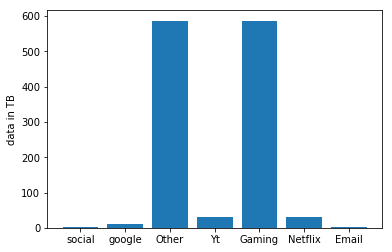

In [36]:
plt.bar(x,y)
plt.ylabel('data in TB')

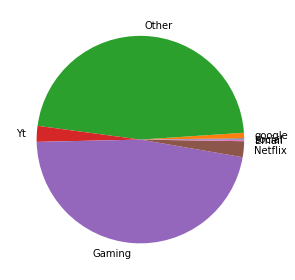

In [37]:
plt.pie(y, labels = x)
plt.tight_layout()
plt.show()

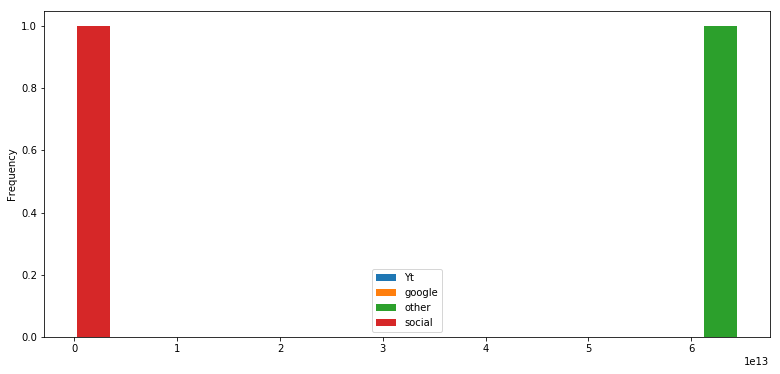

In [38]:
e.plot.hist(bins=20, figsize=(13, 6))

## Bivariate Analysis

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
Bearer Id                                   149010 non-null float64
Start                                       150000 non-null object
Start ms                                    150000 non-null float64
End                                         150000 non-null object
End ms                                      150000 non-null float64
Dur. (ms)                                   150000 non-null float64
IMSI                                        149431 non-null float64
MSISDN/Number                               148935 non-null float64
IMEI                                        149429 non-null float64
Last Location Name                          148848 non-null object
Avg RTT DL (ms)                             122172 non-null float64
Avg RTT UL (ms)                             122189 non-null float64
Avg Bearer TP DL (kbps)                     150000 non-null float64
Avg Bear

In [40]:
apps_info = pd.DataFrame(columns=['Total Ul','Total Dl','Total Consumption'],index=['Netflix','Email','Youtube','Social','Gaming','Google','Other'])
cols = list(apps_info)
cols
for i in cols:
    apps_info[i] = 

SyntaxError: invalid syntax (<ipython-input-40-911cd37314b2>, line 5)

## variable transformation

In [41]:
decile = data.groupby('MSISDN/Number')['Dur. (ms).1'].sum()
decile.reset_index()
decile = pd.DataFrame(decile)
decile[decile['Dur. (ms).1'] >= decile['Dur. (ms).1'].quantile(.50)]


,Dur. (ms).1
MSISDN/Number,
3.360100e+10,116720140.0
3.360100e+10,181230963.0
3.360100e+10,134969374.0
3.360101e+10,253983077.0
3.360101e+10,128360523.0
3.360101e+10,495702147.0
3.360102e+10,124854778.0
3.360102e+10,248424089.0
3.360102e+10,242317271.0


## Correlation Analysis


In [42]:
correlation = df2.drop(['Dur. (ms).1','Total Bytes'],axis = 1)
correlation

C:\Users\Ken\Anaconda2\envs\py3\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Email Total,Gaming total,Yt total,Other total,Google total,Social total,Netflix total
,sum,sum,sum,sum,sum,sum,sum
MSISDN/Number,,,,,,,
3.360100e+10,1331362.0,8.124587e+08,21624548.0,3.865709e+08,4389005.0,2232135.0,27180981.0
3.360100e+10,3307781.0,1.197501e+08,12432223.0,2.817101e+08,5334863.0,2660565.0,11221763.0
3.360100e+10,3205380.0,5.388277e+08,21333570.0,5.016937e+08,3443126.0,3195623.0,19353900.0
3.360101e+10,2284670.0,3.911261e+08,6977321.0,3.527970e+07,9678493.0,280294.0,1942092.0
3.360101e+10,3305469.0,1.314798e+09,41533002.0,8.048045e+08,18499616.0,2912542.0,49201724.0
3.360101e+10,7848596.0,5.116358e+08,34347122.0,4.923728e+08,15263134.0,3792912.0,30315501.0
3.360101e+10,1358959.0,5.484611e+08,26431335.0,2.248887e+08,10196403.0,2769627.0,45812397.0
3.360101e+10,2215563.0,2.823644e+08,18892740.0,1.782015e+08,12023614.0,1782692.0,15292840.0


In [43]:
#creating a correlation matrix
corrMatrix=correlation.corr()
corrMatrix

,,Email Total,Gaming total,Yt total,Other total,Google total,Social total,Netflix total
,,sum,sum,sum,sum,sum,sum,sum
Email Total,sum,1.000000,0.627474,0.704632,0.631024,0.688460,0.634016,0.705466
Gaming total,sum,0.627474,1.000000,0.657408,0.586394,0.642037,0.590048,0.657408
Yt total,sum,0.704632,0.657408,1.000000,0.660380,0.718539,0.659545,0.738445
Other total,sum,0.631024,0.586394,0.660380,1.000000,0.642608,0.591727,0.655831
Google total,sum,0.688460,0.642037,0.718539,0.642608,1.000000,0.643071,0.716191
Social total,sum,0.634016,0.590048,0.659545,0.591727,0.643071,1.000000,0.659974
Netflix total,sum,0.705466,0.657408,0.738445,0.655831,0.716191,0.659974,1.000000


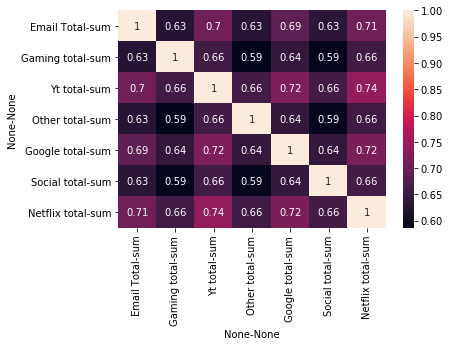

In [44]:
#visual rep of the correlation
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Dimentionality Reduction

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
data_scaled = StandardScaler().fit_transform(correlation)
data_scaled

array([[-0.81778358,  0.47353986, -0.46649148, ..., -0.86064666,
        -0.16552778, -0.20467179],
       [ 0.07153794, -1.06873135, -0.89816106, ..., -0.73528155,
         0.05901282, -0.95430189],
       [ 0.02546097, -0.13568189, -0.48015575, ..., -0.98601456,
         0.33943726, -0.57232235],
       ...,
       [-0.73255596, -0.93893312, -0.92034101, ..., -0.05881838,
        -0.96054237, -0.23232308],
       [ 0.07639803, -0.19954724,  0.24308922, ..., -0.1394091 ,
        -1.06203873, -0.02974666],
       [ 0.08197401, -1.23945404,  0.44059126, ..., -0.22052031,
        -0.52508571, -0.12645237]])

In [46]:
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(corrMatrix)
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df.head()

,PC1,PC2,PC3,PC4
0,-0.021772,0.032335,-0.135311,0.265808
1,0.335246,-0.135088,0.120088,0.010295
2,-0.014912,0.018829,-0.123387,-0.072862
3,-0.237086,-0.250133,0.155931,0.003114
4,-0.009868,0.018878,-0.127377,-0.141812


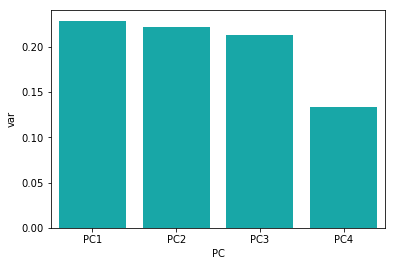

In [47]:
pca.explained_variance_ratio_
f = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sn.barplot(x='PC',y="var", 
           data=f, color="c");

In [48]:
sn.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

KeyError: "['Cluster'] not in index"

# Task 2

## 2.1

In [49]:
session= data.groupby(['MSISDN/Number']).agg({'Bearer Id':['count'],'Dur. (ms).1':['sum'],'Total Bytes':['sum']})

session

,Bearer Id,Dur. (ms).1,Total Bytes
,count,sum,sum
MSISDN/Number,,,
3.360100e+10,1,116720140.0,8.786906e+08
3.360100e+10,1,181230963.0,1.568596e+08
3.360100e+10,1,134969374.0,5.959665e+08
3.360101e+10,1,49878024.0,4.223207e+08
3.360101e+10,2,37104453.0,1.457411e+09
3.360101e+10,2,253983077.0,6.152172e+08
3.360101e+10,2,128360523.0,6.547231e+08
3.360101e+10,1,86399977.0,3.326604e+08


In [50]:
#top 10 sessions
#data.groupby(['MSISDN/Number', 'Bearer Id']).size().reset_index(name = 'Count').sort_values(by = 'Count', ascending = False).head(10)
sessions = data.groupby(['MSISDN/Number'])['Bearer Id'].count().sort_values(ascending = False)
sessions = pd.DataFrame(sessions)
sessions.head(10)

,Bearer Id
MSISDN/Number,
3.362632e+10,18
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.376054e+10,15
3.367588e+10,15
3.366716e+10,13
3.362708e+10,12
3.376041e+10,12


In [51]:
#top 10 durations
duration = data.groupby(['MSISDN/Number'])['Dur. (ms).1'].sum().sort_values(ascending=False)
duration = pd.DataFrame(duration)
duration.head(10)

,Dur. (ms).1
MSISDN/Number,
3.362578e+10,1.855376e+10
3.361489e+10,9.966906e+09
3.376054e+10,9.279442e+09
3.362632e+10,8.791937e+09
3.366716e+10,8.744922e+09
3.366284e+10,6.614274e+09
3.366469e+10,6.288736e+09
3.360313e+10,6.287767e+09
3.366746e+10,5.649885e+09


In [52]:
#top 10 total bytes
byte = data.groupby(['MSISDN/Number'])['Total Bytes'].sum().sort_values(ascending = False)
byte = pd.DataFrame(byte)
byte.head(10)


,Total Bytes
MSISDN/Number,
3.361489e+10,8.846226e+09
3.376054e+10,8.514774e+09
3.362578e+10,8.499621e+09
3.362632e+10,7.971167e+09
3.367588e+10,7.891111e+09
3.365973e+10,7.705863e+09
3.366646e+10,7.308501e+09
3.376041e+10,7.132371e+09
3.366471e+10,6.872018e+09


## normalizing the data set

In [210]:
norm=sessions.merge(byte,on='MSISDN/Number').merge(duration,on='MSISDN/Number')
norm = ((norm-norm.min())/(norm.max()-norm.min()))
norm

,Bearer Id,Total Bytes,Dur. (ms).1
MSISDN/Number,,,
3.362632e+10,1.000000,0.900708,0.473660
3.362578e+10,0.944444,0.960671,1.000000
3.361489e+10,0.944444,1.000000,0.537012
3.365973e+10,0.888889,0.870604,0.217198
3.376054e+10,0.833333,0.962390,0.499945
3.367588e+10,0.833333,0.891624,0.261978
3.366716e+10,0.722222,0.633741,0.471125
3.362708e+10,0.666667,0.649211,0.253220
3.376041e+10,0.666667,0.805530,0.286550


## Applying kmeans clustering

In [54]:
kmeans = KMeans(n_clusters=3).fit(norm)
y = kmeans.fit_predict(norm[['Total Bytes','Dur. (ms).1']])
norm['cluster'] = y


In [55]:
kmeans.cluster_centers_

array([[0.03436688, 0.00545965],
       [0.20624916, 0.02014067],
       [0.09063768, 0.0071105 ]])

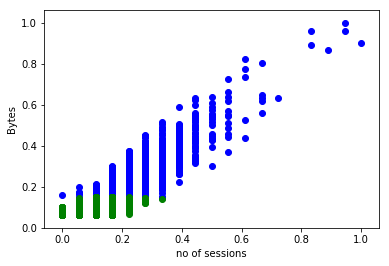

In [56]:
#plot the clusters
color=['blue','green']
size = [100,500,100,500,100,500,100,500]

for k in range(0,2):
    j=norm[norm["cluster"]==k+1]
    plt.scatter(j["Bearer Id"],j["Total Bytes"],c=color[k])
plt.xlabel('no of sessions')
plt.ylabel('Bytes')
plt.show()

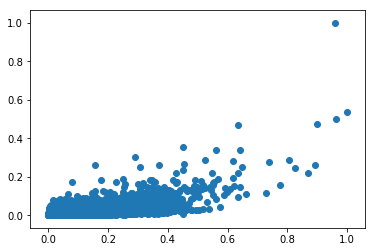

In [57]:
plt.scatter(norm['Total Bytes'],norm['Dur. (ms).1'])


## elbow plot

this helps us find the optimum clusters

In [58]:
krng = range(1,12)
sse = []
for k in krng:
    km = KMeans(n_clusters=k)
    km.fit(norm[['Bearer Id','Total Bytes','Dur. (ms).1']])
    sse.append(km.inertia_)

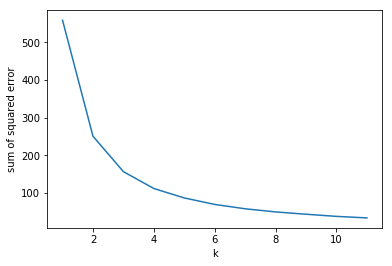

In [59]:
sse
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(krng,sse)

From the elbow plot we can choose any number of clusters between 4 to 8 because that is where the graph is most accurate and nott constant.

In [60]:
kmeans = KMeans(n_clusters=8).fit(norm)
y = kmeans.fit_predict(norm[['Bearer Id','Total Bytes']])
norm['cluster new'] = y

In [61]:
norm

,Bearer Id,Total Bytes,Dur. (ms).1,cluster,cluster new
MSISDN/Number,,,,,
3.362632e+10,1.000000,0.900708,0.473660,1,6
3.362578e+10,0.944444,0.960671,1.000000,1,6
3.361489e+10,0.944444,1.000000,0.537012,1,6
3.365973e+10,0.888889,0.870604,0.217198,1,6
3.376054e+10,0.833333,0.962390,0.499945,1,6
3.367588e+10,0.833333,0.891624,0.261978,1,6
3.366716e+10,0.722222,0.633741,0.471125,1,6
3.362708e+10,0.666667,0.649211,0.253220,1,6
3.376041e+10,0.666667,0.805530,0.286550,1,6


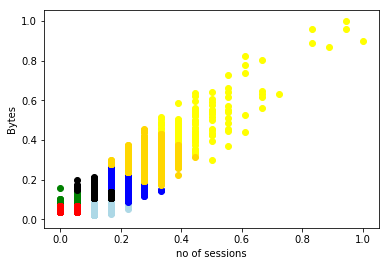

In [62]:
#plot the clusters
color=['lightblue','blue','green','black','red','yellow','gold','purple']
size = [100,500,100,500,100,500,100,500]

for k in range(0,8):
    j=norm[norm["cluster new"]==k+1]
    plt.scatter(j["Bearer Id"],j["Total Bytes"],c=color[k])
plt.xlabel('no of sessions')
plt.ylabel('Bytes')
plt.show()

## total traffic per app

In [63]:
traffic = data.groupby(['MSISDN/Number']).agg({'Social total': ['sum'],
                                     'Yt total': ['sum'], 'Netflix total' : ['sum'],
                                     'Gaming total' : ['sum'],'Google total': ['sum'],
                                     'Email Total': ['sum'],'Other total': ['sum'],
                                    })
traffic

,Email Total,Netflix total,Yt total,Other total,Social total,Google total,Gaming total
,sum,sum,sum,sum,sum,sum,sum
MSISDN/Number,,,,,,,
3.360100e+10,1331362.0,27180981.0,21624548.0,3.865709e+08,2232135.0,4389005.0,8.124587e+08
3.360100e+10,3307781.0,11221763.0,12432223.0,2.817101e+08,2660565.0,5334863.0,1.197501e+08
3.360100e+10,3205380.0,19353900.0,21333570.0,5.016937e+08,3195623.0,3443126.0,5.388277e+08
3.360101e+10,2284670.0,1942092.0,6977321.0,3.527970e+07,280294.0,9678493.0,3.911261e+08
3.360101e+10,3305469.0,49201724.0,41533002.0,8.048045e+08,2912542.0,18499616.0,1.314798e+09
3.360101e+10,7848596.0,30315501.0,34347122.0,4.923728e+08,3792912.0,15263134.0,5.116358e+08
3.360101e+10,1358959.0,45812397.0,26431335.0,2.248887e+08,2769627.0,10196403.0,5.484611e+08
3.360101e+10,2215563.0,15292840.0,18892740.0,1.782015e+08,1782692.0,12023614.0,2.823644e+08


In [64]:
netflix = data.groupby(['MSISDN/Number'])['Netflix total'].sum().sort_values(ascending = False)
email = data.groupby(['MSISDN/Number'])['Email Total'].sum().sort_values(ascending = False)
social = data.groupby(['MSISDN/Number'])['Social total'].sum().sort_values(ascending = False)
google = data.groupby(['MSISDN/Number'])['Google total'].sum().sort_values(ascending = False)
other = data.groupby(['MSISDN/Number'])['Other total'].sum().sort_values(ascending = False)
yt = data.groupby(['MSISDN/Number'])['Yt total'].sum().sort_values(ascending = False)
gaming = data.groupby(['MSISDN/Number'])['Gaming total'].sum().sort_values(ascending = False)





In [65]:
app = data.groupby(['MSISDN/Number'])['Netflix total','Email Total',
                                      'Social total','Google total',
                                      'Other total','Yt total',
                                      'Gaming total'].sum()
app
cols = list (app)
for i in cols:
    print ('top 10 users in',i)
    print(app[i].sort_values(ascending = False).head(10))

top 10 users in Netflix total
MSISDN/Number
3.365973e+10    399519079.0
3.361489e+10    361401046.0
3.362578e+10    356980607.0
3.376054e+10    334643269.0
3.362632e+10    328725740.0
3.376041e+10    318347546.0
3.366716e+10    313939488.0
3.367588e+10    309093159.0
3.378632e+10    305939790.0
3.376127e+10    292091341.0
Name: Netflix total, dtype: float64
top 10 users in Email Total
MSISDN/Number
3.362632e+10    42418782.0
3.361489e+10    40788634.0
3.362578e+10    40633966.0
3.378632e+10    36310123.0
3.365973e+10    35999792.0
3.376054e+10    33693767.0
3.367588e+10    31514421.0
3.366546e+10    30417885.0
3.366716e+10    30335796.0
3.369879e+10    29059042.0
Name: Email Total, dtype: float64
top 10 users in Social total
MSISDN/Number
3.362632e+10    43374779.0
3.376054e+10    39783189.0
3.365973e+10    35412358.0
3.361489e+10    28294544.0
3.362578e+10    27135500.0
3.366716e+10    24247850.0
3.378632e+10    23974919.0
3.366907e+10    23800834.0
3.360313e+10    23077825.0
3.365849

# Task 3 : Experience Analysis

## 3.1

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
Bearer Id                                   149010 non-null float64
Start                                       150000 non-null object
Start ms                                    150000 non-null float64
End                                         150000 non-null object
End ms                                      150000 non-null float64
Dur. (ms)                                   150000 non-null float64
IMSI                                        149431 non-null float64
MSISDN/Number                               148935 non-null float64
IMEI                                        149429 non-null float64
Last Location Name                          148848 non-null object
Avg RTT DL (ms)                             122172 non-null float64
Avg RTT UL (ms)                             122189 non-null float64
Avg Bearer TP DL (kbps)                     150000 non-null float64
Avg Bear

In [67]:
#creating new columns for the totals
data['Total TCP'] = data['TCP DL Retrans. Vol (Bytes)']+data['TCP UL Retrans. Vol (Bytes)']
data['Avg RTT'] = data['Avg RTT DL (ms)']+data['Avg RTT UL (ms)']
data['Avg throughput'] = data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']

In [217]:
# aggregating the data
handset = data.groupby(['MSISDN/Number'])['Handset Type'].count()
exp = data.groupby(['MSISDN/Number'])['Total TCP','Avg RTT','Avg throughput'].sum()
exp

,Total TCP,Avg RTT,Avg throughput
MSISDN/Number,,,
3.360100e+10,0.0,46.0,76.0
3.360100e+10,0.0,31.0,99.0
3.360100e+10,0.0,0.0,97.0
3.360101e+10,0.0,84.0,248.0
3.360101e+10,9370832.0,119.0,56844.0
3.360101e+10,0.0,24.0,7908.0
3.360101e+10,110232.0,53.0,42513.0
3.360101e+10,0.0,52.0,1247.0
3.360101e+10,0.0,0.0,189.0


 Compute & list 10 of the top, bottom and most frequent 
 *Tcp values
 *rtt values
 *throughput

In [70]:
cols =list(exp)
for i in cols:
    print('top 10',i)
    print(exp[i].sort_values(ascending = False).head(10))
    print('botton 10', i)
    print(exp[i].sort_values().head(10))
    print('most common',i)
    print(exp[i].mode())


top 10 Total TCP
MSISDN/Number
3.366773e+10    8.354209e+09
3.365908e+10    7.941860e+09
3.376128e+10    6.043978e+09
3.376264e+10    5.879989e+09
3.365066e+10    5.593366e+09
3.366318e+10    5.566929e+09
3.376357e+10    5.179459e+09
3.366905e+10    5.174215e+09
3.365864e+10    5.165857e+09
3.376386e+10    5.095685e+09
Name: Total TCP, dtype: float64
botton 10 Total TCP
MSISDN/Number
3.360100e+10    0.0
3.366674e+10    0.0
3.366674e+10    0.0
3.366674e+10    0.0
3.366674e+10    0.0
3.366674e+10    0.0
3.366674e+10    0.0
3.366674e+10    0.0
3.366674e+10    0.0
3.366674e+10    0.0
Name: Total TCP, dtype: float64
most common Total TCP
0    0.0
dtype: float64
top 10 Avg RTT
MSISDN/Number
3.366232e+10    96924.0
3.366087e+10    64670.0
3.368369e+10    54848.0
3.369855e+10    46021.0
3.376181e+10    37084.0
3.366879e+10    36304.0
3.376094e+10    27278.0
3.360679e+10    26300.0
3.367182e+10    25715.0
3.378187e+10    25388.0
Name: Avg RTT, dtype: float64
botton 10 Avg RTT
MSISDN/Number
8.82

## 3.3
Compute & report:
*The distribution of the average throughput  per handset type and provide interpretation for your findings.
*The average TCP retransmission view per handset type and provide interpretation for your findings.


In [71]:
handsets = data.groupby('Handset Type')['Total TCP','Avg RTT','Avg throughput'].sum()
handsets

,Total TCP,Avg RTT,Avg throughput
Handset Type,,,
A-Link Telecom I. Cubot A5,0.000000e+00,42.0,23510.0
A-Link Telecom I. Cubot Note Plus,6.162130e+05,1589.0,6699.0
A-Link Telecom I. Cubot Note S,4.141173e+07,890.0,8937.0
A-Link Telecom I. Cubot Nova,1.371700e+05,44.0,56217.0
A-Link Telecom I. Cubot Power,8.041000e+03,43.0,69468.0
A-Link Telecom I. Cubot R9,3.099900e+04,231.0,4039.0
A-Link Telecom I. Cubot X18 Plus,2.692082e+06,87.0,25118.0
Acer Liquid M220,0.000000e+00,0.0,34.0
Acer Liquid Z220,1.743870e+05,326.0,552.0


## 3.4
Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. - (jupyter notebook + slide )


In [72]:
exp = ((exp-exp.min())/(exp.max()-exp.min()))

kmeans = KMeans(n_clusters=3).fit(exp)
y = kmeans.fit_predict(exp[['Total TCP','Avg RTT','Avg throughput']])
exp['cluster'] = y

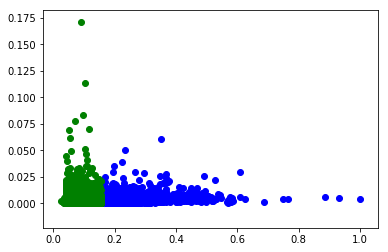

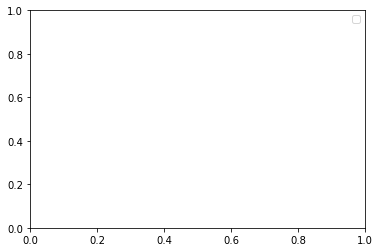

In [73]:

color=['blue','green','cyan']
for k in range(0,3):
    j=exp[exp["cluster"]==k+1]
    plt.scatter(j["Avg throughput"],j["Avg RTT"],c=color[k])
plt.show()
plt.legend(exp['cluster'])

# Task 4

In [74]:
norm

,Bearer Id,Total Bytes,Dur. (ms).1,cluster,cluster new
MSISDN/Number,,,,,
3.362632e+10,1.000000,0.900708,0.473660,1,6
3.362578e+10,0.944444,0.960671,1.000000,1,6
3.361489e+10,0.944444,1.000000,0.537012,1,6
3.365973e+10,0.888889,0.870604,0.217198,1,6
3.376054e+10,0.833333,0.962390,0.499945,1,6
3.367588e+10,0.833333,0.891624,0.261978,1,6
3.366716e+10,0.722222,0.633741,0.471125,1,6
3.362708e+10,0.666667,0.649211,0.253220,1,6
3.376041e+10,0.666667,0.805530,0.286550,1,6


In [139]:
from sklearn.metrics.pairwise import euclidean_distances

measure = norm[norm['cluster'] ==0]
measure = measure.drop(['cluster','cluster new'], axis = 1)
clusterx =[]
cols = list(measure)
for i in cols:
    x=measure[i].sum()
    x= x/49940
    clusterx.append(x)
measure = pd.DataFrame(measure)

In [209]:
from math import sqrt
es = []
for index,row in norm.iterrows():
    ex =sqrt((row['Bearer Id']-clusterx[0])**2 + (row['Total Bytes']-clusterx[1])**2+
                      (row['Dur. (ms).1']-clusterx[2])**2)
    es.append(ex)

In [211]:
import math
#measure['engagement score'].apply(math.sqrt)
norm = norm.reset_index()
es = pd.DataFrame(es)
engagement = pd.concat([norm,es],axis=1)
engagement

,MSISDN/Number,Bearer Id,Total Bytes,Dur. (ms).1,0
0,3.362632e+10,1.000000,0.900708,0.473660,1.362528
1,3.362578e+10,0.944444,0.960671,1.000000,1.622462
2,3.361489e+10,0.944444,1.000000,0.537012,1.414293
3,3.365973e+10,0.888889,0.870604,0.217198,1.197477
4,3.376054e+10,0.833333,0.962390,0.499945,1.306303
5,3.367588e+10,0.833333,0.891624,0.261978,1.183784
6,3.366716e+10,0.722222,0.633741,0.471125,1.008382
7,3.362708e+10,0.666667,0.649211,0.253220,0.899719
8,3.376041e+10,0.666667,0.805530,0.286550,1.021680
9,3.360452e+10,0.666667,0.618929,0.280420,0.887346


In [143]:
measure_exp = exp[exp['cluster'] ==0]
#measure = measure.drop(['cluster','cluster new'], axis = 1)
clusterxp =[]
cols = list(measure_exp)
for i in cols:
    x=measure_exp[i].sum()
    x= x/49940
    clusterxp.append(x)
measure_exp = pd.DataFrame(measure_exp)
measure_exp

,Total TCP,Avg RTT,Avg throughput,cluster
MSISDN/Number,,,,
3.360100e+10,0.000000e+00,0.000475,0.000084,0
3.360100e+10,0.000000e+00,0.000320,0.000110,0
3.360100e+10,0.000000e+00,0.000000,0.000108,0
3.360101e+10,0.000000e+00,0.000867,0.000275,0
3.360101e+10,0.000000e+00,0.000248,0.008765,0
3.360101e+10,0.000000e+00,0.000537,0.001382,0
3.360101e+10,0.000000e+00,0.000000,0.000209,0
3.360102e+10,0.000000e+00,0.000640,0.000162,0
3.360102e+10,0.000000e+00,0.000299,0.000085,0


In [218]:
ex = []
for index,row in exp.iterrows():
    exx =sqrt((row['Total TCP']-clusterxp[0])**2 + (row['Avg RTT']-clusterxp[1])**2+
                      (row['Avg throughput']-clusterxp[2])**2)
    ex.append(exx)

In [221]:
exp = exp.reset_index()
ex = pd.DataFrame(ex)
experience_score = pd.concat([exp,ex],axis=1)
experience_score

,index,MSISDN/Number,Total TCP,Avg RTT,Avg throughput,0
0,0,3.360100e+10,0.0,46.0,76.0,8.882798e+01
1,1,3.360100e+10,0.0,31.0,99.0,1.037307e+02
2,2,3.360100e+10,0.0,0.0,97.0,9.699091e+01
3,3,3.360101e+10,0.0,84.0,248.0,2.618303e+02
4,4,3.360101e+10,9370832.0,119.0,56844.0,9.371004e+06
5,5,3.360101e+10,0.0,24.0,7908.0,7.908027e+03
6,6,3.360101e+10,110232.0,53.0,42513.0,1.181459e+05
7,7,3.360101e+10,0.0,52.0,1247.0,1.248075e+03
8,8,3.360101e+10,0.0,0.0,189.0,1.889909e+02
9,9,3.360102e+10,0.0,62.0,146.0,1.586098e+02


In [241]:
engagement=engagement.rename(columns={0:'engagement score'})
#engagement = engagement.drop(['MSISDN/Number'],axis=1)
experience_score = experience_score.rename(columns={0:'exp score'})
satisfaction = pd.concat([engagement,experience_score],axis=1)
satisfaction = satisfaction.drop(['index'],axis=1)
satisfaction['satisfaction score']=(satisfaction['exp score']+satisfaction['engagement score'])/2


KeyError: "['MSISDN/Number'] not found in axis"

In [250]:
satisfaction.groupby('MSISDN/Number')['satisfaction score'].apply(lambda x: x.sort_values(ascending=False).head(10))


0         4.509525e+01
1         5.267658e+01
2         4.920260e+01
3         1.315139e+02
4         4.685503e+06
5         3.954606e+03
6         5.907345e+04
7         6.244871e+02
8         9.500630e+01
9         7.974857e+01
10        4.157074e+01
11        7.297329e+06
12        4.384150e+01
13        7.992591e+00
14        4.946416e+01
15        4.458432e+02
16        5.341604e+01
17        1.162906e+06
18        4.511616e+01
19        7.538824e+01
20        1.003140e+06
21        1.193305e+03
22        5.895946e+01
23        6.436182e+01
24        3.987203e+01
25        5.095207e+01
26        5.778906e+01
27        5.370273e+01
28        6.384418e+03
29        3.901883e+06
              ...     
106826    9.652494e+01
106827    3.744830e+01
106828    4.118996e+01
106829    7.052673e+01
106830    7.202893e+01
106831    8.642682e+01
106832    6.679411e+01
106833    2.040459e+06
106834    7.980576e+03
106835    7.217565e+03
106836    3.553591e+01
106837    5.052510e+01
106838    1

## 4.3 Regression model

## 4.4 k means

In [ ]:
kmeans = KMeans(n_clusters=3).fit(norm)
y = kmeans.fit_predict(satisfaction[['Total Bytes','Dur. (ms).1']])
norm['cluster'] = y
